# Super resolution of image 

In [1]:
!git clone https://github.com/xinntao/ESRGAN
%cd ESRGAN

Cloning into 'ESRGAN'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 225 (delta 4), reused 7 (delta 2), pack-reused 216
Receiving objects: 100% (225/225), 24.86 MiB | 21.29 MiB/s, done.
Resolving deltas: 100% (84/84), done.
/kaggle/working/ESRGAN


Getting the pretrained model

In [2]:
!ls

LICENSE  README.md	  models	 test.py
LR	 RRDBNet_arch.py  net_interp.py  transer_RRDB_models.py
QA.md	 figures	  results


In [3]:
!wget 'https://drive.google.com/u/0/uc?id=1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene&export=download' --output-document esr.pth

--2022-03-13 05:00:26--  https://drive.google.com/u/0/uc?id=1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene&export=download
Resolving drive.google.com (drive.google.com)... 173.194.218.138, 173.194.218.113, 173.194.218.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.218.138|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene&export=download [following]
--2022-03-13 05:00:26--  https://drive.google.com/uc?id=1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-4k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ae065bpehplc7n6qc4rdnndf7ge80625/1647147600000/15659024415184981874/*/1TPrz5QKd8DHHt1k8SRtm6tMiPjz_Qene?e=download [following]
--2022-03-13 05:00:28--  https://doc-0k-4k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksu

In [4]:
!mv esr.pth ./models/esr.pth

In [5]:
import os.path as osp
import glob
import cv2
import numpy as np
import torch
import RRDBNet_arch as arch

model_path = 'models/esr.pth'  # models/RRDB_ESRGAN_x4.pth OR models/RRDB_PSNR_x4.pth
device = torch.device('cuda')  # if you want to run on CPU, change 'cuda' -> cpu
# device = torch.device('cpu')

test_img_folder = 'LR/*'

model = arch.RRDBNet(3, 3, 64, 23, gc=32)
model.load_state_dict(torch.load(model_path), strict=True)
model.eval()
model = model.to(device)

print('Model path {:s}. \nTesting...'.format(model_path))

idx = 0
for path in glob.glob(test_img_folder):
    idx += 1
    base = osp.splitext(osp.basename(path))[0]
    print(idx, base)
    # read images
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = img * 1.0 / 255
    img = torch.from_numpy(np.transpose(img[:, :, [2, 1, 0]], (2, 0, 1))).float()
    img_LR = img.unsqueeze(0)
    img_LR = img_LR.to(device)

    with torch.no_grad():
        output = model(img_LR).data.squeeze().float().cpu().clamp_(0, 1).numpy()
    output = np.transpose(output[[2, 1, 0], :, :], (1, 2, 0))
    output = (output * 255.0).round()
    cv2.imwrite('results/{:s}_rlt.png'.format(base), output)

Model path models/esr.pth. 
Testing...
1 comic
2 baboon


## input image

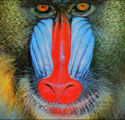

In [6]:
from IPython.display import Image
Image(filename='./LR/baboon.png') 

## test image

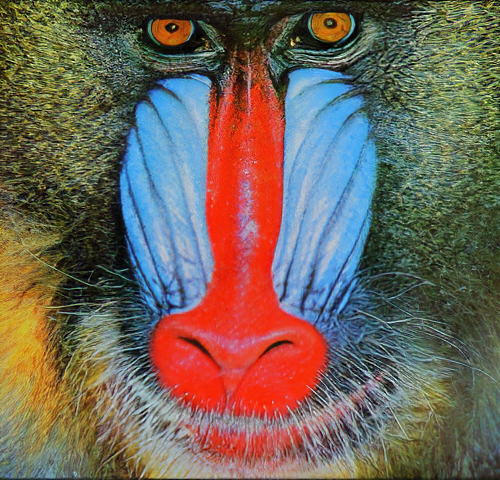

In [7]:

Image(filename='./results/baboon_rlt.png') 

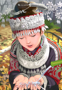

In [8]:
Image(filename='./LR/comic.png')

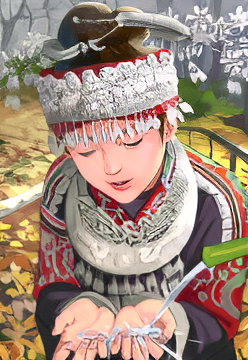

In [9]:
Image(filename='./results/comic_rlt.png') 

In [10]:
!wget "https://www.researchgate.net/profile/Gael-Chareyron/publication/243582967/figure/fig5/AS:671521458630674@1537114600776/Representation-of-image-Parrots-watermarked-twice-cell-size-16x16-Meanwhile-some.jpg" --output-document 'sample.jpg'

--2022-03-13 05:00:40--  https://www.researchgate.net/profile/Gael-Chareyron/publication/243582967/figure/fig5/AS:671521458630674@1537114600776/Representation-of-image-Parrots-watermarked-twice-cell-size-16x16-Meanwhile-some.jpg
Resolving www.researchgate.net (www.researchgate.net)... 104.17.32.105, 104.17.33.105, 2606:4700::6811:2169, ...
Connecting to www.researchgate.net (www.researchgate.net)|104.17.32.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26042 (25K) [image/png]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>]  25.43K  --.-KB/s    in 0s      

2022-03-13 05:00:40 (79.0 MB/s) - ‘sample.jpg’ saved [26042/26042]



In [11]:
!mkdir new_images
!mv sample.jpg new_images/sample.jpg

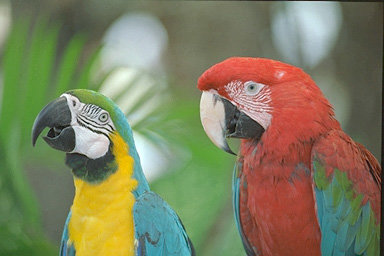

In [12]:
Image(filename='./new_images/sample.jpg') 

In [13]:
def get_high_resolution_img(path = './new_images/sample.jpg'):
    base = osp.splitext(osp.basename(path))[0]
    print(idx, base)
        # read images
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = img * 1.0 / 255
    img = torch.from_numpy(np.transpose(img[:, :, [2, 1, 0]], (2, 0, 1))).float()
    img_LR = img.unsqueeze(0)
    img_LR = img_LR.to(device)

    with torch.no_grad():
        output = model(img_LR).data.squeeze().float().cpu().clamp_(0, 1).numpy()
    output = np.transpose(output[[2, 1, 0], :, :], (1, 2, 0))
    output = (output * 255.0).round()
    cv2.imwrite('output.png'.format(base), output)
    print(f"output saved as output.png")

In [14]:
get_high_resolution_img()

2 sample
output saved as output.png


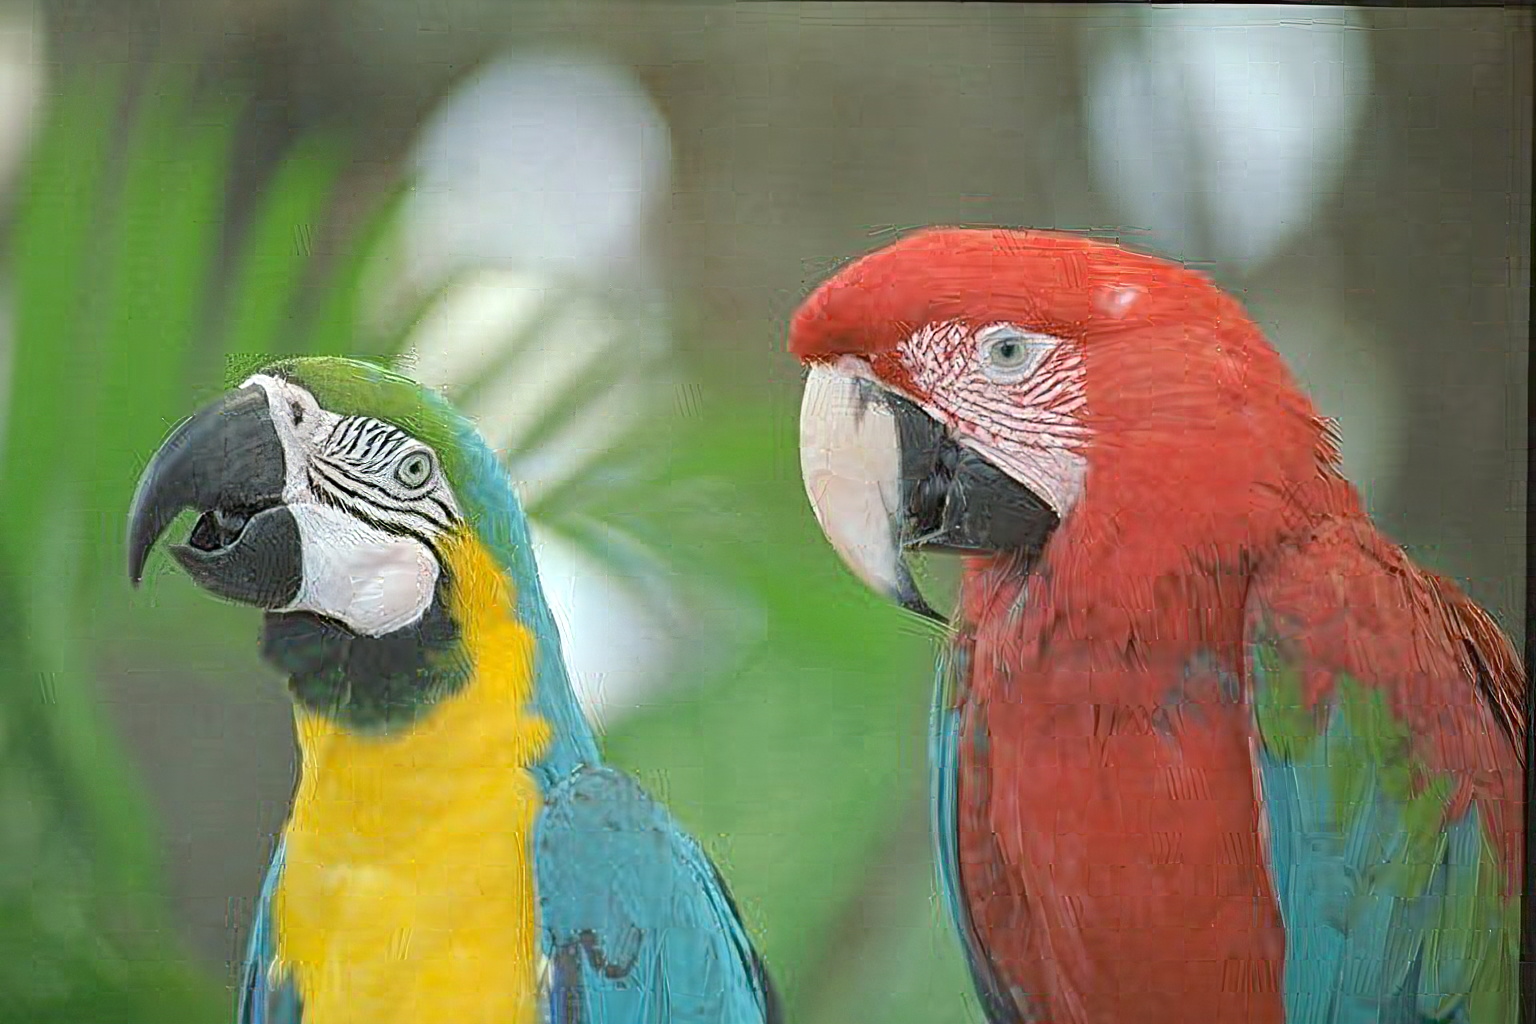

In [15]:
Image(filename='output.png') 

In [16]:
!pip install ipyplot

In [17]:
# creating a full structure end to end

import ipyplot

def download_and_get_resolution(url="https://raw.githubusercontent.com/fanbyprinciple/kaggle_kernels/master/IMG-20220312-WA0012.jpg"):
    !wget '{url}' --output-document 'sample.jpg'
    print("The input image")
    Image(filename='sample.jpg')
    get_high_resolution_img('sample.jpg')
    print("The output image")
    Image(filename='output.png')
    
    ipyplot.plot_images(['sample.jpg', 'output.png'])
    
    

# put your test image here

In [18]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZPTcJzsk_qrtU57VpBphWGokjfR_OimZEyQ&usqp=CAU'
download_and_get_resolution(url=url)

--2022-03-13 05:00:54--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZPTcJzsk_qrtU57VpBphWGokjfR_OimZEyQ&usqp=CAU
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 74.125.31.139, 74.125.31.100, 74.125.31.138, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|74.125.31.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4135 (4.0K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>]   4.04K  --.-KB/s    in 0s      

2022-03-13 05:00:54 (53.8 MB/s) - ‘sample.jpg’ saved [4135/4135]

The input image
2 sample
output saved as output.png
The output image


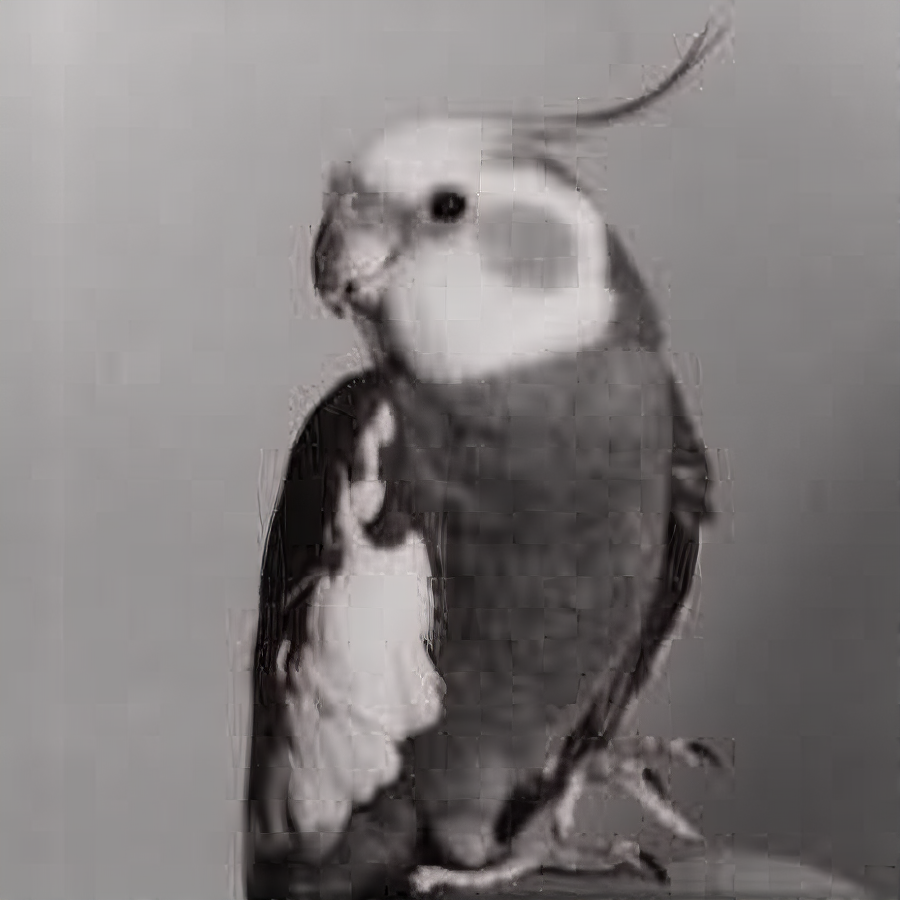

In [19]:
Image(filename='output.png')